---
# Capitulo 2
## Herramientas para el análisis distributivo
### Rutina de Python para replicar el "Apéndice en la Práctica" del capítulo 2 de Pobreza y Desigualdad en América Latina 
Códigos escritos en base a los apéndices del libro “Pobreza y Desigualdad en América Latina” de Gasparini, Cicowiez y Sosa Escudero. El objeto de este material es reproducir la rutina de códigos para Stata presentada en el libro al lenguaje Python. Este material es sólo de carácter complementario a las explicaciones y detalles conceptuales que se presentan en el libro de texto y los apéndices.
### Ultima actualización: 15 de junio de 2022
---

## Set inicial
Antes de comenzar, se cargan las librerías necesarias para poder desarrollar el capítulo. 
- *wget*: para descargar archivos. Lo debemos instalar con la sentencia `!pip install`.
- *zipfile*: para comprimir y descomprimir archivos zip.
- *os*: realizar consultas acerca de directorios o pedidos específicos al sistema opertivo.
- *pandas*: necesario para manipulación y análisis de datos.
- *matplotlib*: para visualización.
- *seaborn*: otra librería para visualización.
- *numpy*: para creación y manipulación de vectores y matrices. También presenta una gran colección de funciones matemáticas para operar con ellas.
- *math*: para utilizar también funciones matemáticas.
- *scipy*: herramientas y algoritmos matemáticos. contiene módulos para optimización, álgebra lineal, integración, interpolación, funciones especiales.
- *warnings*: configurar la presencia de advertencias que arrojan las funciones.

In [1]:
#Importamos librerias
!pip install wget
import wget
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import seaborn as sns
import numpy as np
import math
from scipy import stats
import warnings

Como se puede ver en la primer línea de códigos, hay diferentes formas de activar una librería o una función dentro de esta. En el caso en que esta se encuentre dentro de *python* podemos cargar la librería con `import`, `from...import...` para importar una función específica dentro de la librería. En el caso en que esta librería no se encuentre directamente en nuestro propio `sys.path` debemos instalarlo previamente, como hacemos con `wget` a través de la sentencia `!pip install`.

## 2.1 Introducción: ejemplo Brasil
[***Página 72***](https://drive.google.com/file/d/1MwQrMylnYL0VHrLRM3JafsCBE9NkisAJ/view)

El siguiente código es introductorio y busca guiar al lector en la sintaxis básica a utilizar, mostrando a modo de ejemplo cómo replicar los resultados correspondientes al cuadro 2.1 del texto.

Como será al inicio de cada capítulo, el primer paso es obtener base de datos. Para esta sección, utilizaremos la versión procesada de la PNAD (Pesquisa Nacional por Amostra de Domicílios) de Brasil para el año 2007, a la cual accederemos desde la página del [***CEDLAS***](https://www.cedlas.econo.unlp.edu.ar/wp/en/publicaciones/libros/pobreza-y-desigualdad-en-america-latina/#1505501369949-15c93bca-b4f8). Para acceder e importar la base se utiliza el procedimiento que se explica a continuación. Se crea una variable *url* que guarda el link donde se encuentra el archivo comprimido en formato *.zip*. Luego, se procede a descargar dicho archivo con la función `download()` de `wget`. Como el nombre del comprimido coincide con el archivo *.dta* que se encuentra contenido dentro, utilizamos la función `split()` que es estándar de *python* para guardar el nombre del archivo, sin la especificación del formato. Posteriormente, con la función `Zipfile()` de la librería `zipfile` descomprimimos el *.zip* y nos quedamos solamente con el archivo *.dta*, ya que con `os.remove()` eliminamos el comprimido de nuestro directorio de trabajo, evaluando primero si el archivo existe con `os.path.exists()`. Pasado este punto, importamos la base con la función `read_stata` de `pandas`. 

Las encuestas de hogares, al igual que cualquier otra base de datos, se organizan en Python como objetos tipo tabla de doble entrada que reciben el nombre de *dataframe*, donde las filas representan observaciones o registros y las columnas variables o campos. Para poder ver visualizar el *dataframe* podemos utilizar dos alternativas (aunque existen otras, estas son las más comunes). Primero, podríamos leerlo en python solamente escribiendo el nombre de la base generada. La segunda opción sería utilizando `print()`. Por supuesto, las diferencias entre ambas formas es muy sutil, y en nuestro caso, no existirían diferencias entre usar una opción u otra. Para curiosos, pueden encontrar más info en [***stackoverflow***](https://stackoverflow.com/questions/8621000/in-python-idle-whats-the-difference-between-printing-a-variable-and-just-wri). En nuestro caso, utilizamos la primera opción, que se puede ver cuando imprimimos *df* en la segunda línea que se ve a continuación.

In [2]:
# descargamos el archivo zip 
url='https://www.cedlas.econo.unlp.edu.ar/wp/wp-content/uploads/bra07.zip'
d = wget.download(url)
fileName = d.split('.')[0]
# descomprimimos y eliminamos el archivo .zip
with zipfile.ZipFile(f'{fileName}.zip', 'r') as zip_ref:
     zip_ref.extractall(os.getcwd())
## le damos estilo a la función print()
# Utilizamos algunos estilos 
class style():
    black = '\033[30m'
    red = '\033[31m'
    green = '\033[1;32m' # bold
    underline = '\033[4m'
    mark = '\33[44m'
    endc = '\033[0m'
# si el comprimido existe en nuestro directorio lo eliminamos 
if os.path.exists(f'{fileName}.zip'):
    os.remove(f'{fileName}.zip')
    print(style.green + "El archivo ha sido removido exitosamente")
else:
    print(style.green + "El archivo no existe!")
# cargamos el arcivho .dta
df = pd.read_stata(f'{fileName}.dta')
df

El archivo ha sido removido exitosamente


,edad,pondera,id,hombre,nivel,region,urbano,ipcf
0,73,239,14.0,0,0.0,1,1,0.00000
1,52,238,16.0,0,0.0,1,1,0.00000
2,10,238,16.0,1,1.0,1,1,0.00000
3,34,238,34.0,0,5.0,1,1,0.00000
4,11,238,34.0,1,1.0,1,1,0.00000
...,...,...,...,...,...,...,...,...
394546,28,180,12621.0,0,4.0,1,0,49591.71875
394547,0,180,12621.0,1,0.0,1,0,49591.71875
394548,8,179,12621.0,0,1.0,1,0,49591.71875
394549,60,642,72715.0,1,6.0,3,1,66000.00000


Al utilizar Stata resulta visualmente mejor imprimir los resultados con display asignando un color a este. Solemos utilizar `display as res | as err | as text`. Para *python* utilizamos una estrategia diferente, creamos una clase llamada `style()` que va a contener diferentes colores con la definición de color [***ANSI***](https://xdevs.com/guide/color_serial/). Así, antes de escribir el texto en `print()` configuramos el color verde a la oración con `style.green`.    

Por otra parte, cabe aclarar que las líneas que inician con numeral (*#*) son comentarios, es decir, se trata de líneas que en general documentan el código pero que Python ignora a la hora de computar los resultados.

Con la base de Brasil importada podemos indagar un poco más acerca de la composición del *dataframe* utilizando la función `info()` de `pandas`. El *output* que arroja la función muestra la cantidad de entradas u observaciones, la cantidad de columnas e información de cada variable que compone el *dataset*. Indicando nombre, cantidad de observaciones nulas y no nulas y el tipo de formato de la variable (numérica, *string¨* o booleana). 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394551 entries, 0 to 394550
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   edad     394551 non-null  int16  
 1   pondera  394551 non-null  int16  
 2   id       394551 non-null  float32
 3   hombre   394551 non-null  int8   
 4   nivel    393101 non-null  float64
 5   region   394551 non-null  int8   
 6   urbano   394551 non-null  int8   
 7   ipcf     394551 non-null  float32
dtypes: float32(2), float64(1), int16(2), int8(3)
memory usage: 11.7 MB


Por tratarse de una encuesta, cada observación representa a varios individuos, tantos como indica el factor de expansión o variable de ponderación. En nuestro caso, todas las encuestas que utilizaremos contienen una variable de nombre *pondera* que almacena el factor de expansión. Para más detalles sobre el uso de ponderadores, consultar más adelante la sección 3.6.

El primer paso es extraer las variables de interés del dataframe *df*. En nuestro caso, utilizamos las variables *ipcf* y el factor de expansión *pondera*. Con estos inputs podemos calcular la media y desvío estándar del ingreso per cápita familiar a partir de la función `average()` de la librería `numpy` y `sqrt()` de la librería `math`. 

A su vez, podríamos querer saber cuánta gente está representada por la encuesta, para ello podríamos sumar la cantidad de observaciones considerando el factor de expansión de cada observación. Para esto último, usamos la función `sum()` que viene incluído en *python* sobre la variable *pondera*. La población de referencia de la PNAD 2007 es 187 millones de personas aproximadamente. Por último, podemos computar el coeficiente de variación del *ipcf* una vez calculado su desvío estándar y su media. Para visualizar los resultados utilizamos la función estándar `print()` con el argumento '*f* ' que significa [*Formatted string literals*](https://docs.python.org/3.6/reference/lexical_analysis.html#formatted-string-literals), lo cual básicamente hace que las sentencias dentro de las llaves `{}` sean reemplazados por los valores de la respectiva variable, si es que existen. Un argumento muy útil para darle formato a las *string* (como en la visualización del cálculo de la población de Brasil) y cómodo para visualizar resultados combinados con texto, inclusive el recurso `\n` permite separar los diferentes *prints*, permitiendo mayor prolijidad en la impresión de resultados (Más info en [*print(f"...")*](https://tutorial.eyehunts.com/python/printf-python-python-f-print-example-code/#:~:text=Print(f%20Python)%3A%20The,is%20more%20readable%20and%20fast.)). A su vez, se redondean los resultados con la función estándar de python `round()`. En el caso del redondeo del coeficiente de variación *cv* se agrega un segundo argumento que representa la cantidad de decimales a mostrar (2 en este caso), ya que por defecto al función no mostraría ninguno. También, le damos formato al resultado de la población de Brasil, especificando cómo debe formarse el número con `{:,}.format()`, que lo que le dice a `print()` es que separe los miles con comas `,` a la variable *pop* para imprimirlo.        

In [4]:
# Extraemos las columnas del IPCF y los ponderadores y las convertimos en vectores
ipcf=df['ipcf']
pondera=df['pondera']

# Utilizamos esos vectores para calcular el promedio y la varianza del IPCF
media = np.average(ipcf, weights=pondera) 
var = np.average((ipcf-media)**2, weights=pondera) 
de = math.sqrt(var)

# Calculamos la poblacion total de referencia
pop = pondera.sum()

# Calculamos el coeficiente de variacion
cv = de/media

# visualizamos resultados
print(style.green + f'Media del IPCF = {round(media)}; Desvío estándar del IPCF = {round(de)}\n')
print(style.green + f'Población de referencia Brasil = {"{:,}".format(pop)}\n')
print(style.green + f'Coeficiente de variacion del IPCF = {round(cv, 2)}')

Media del IPCF = 574; Desvío estándar del IPCF = 970

Población de referencia Brasil = 186,985,040

Coeficiente de variacion del IPCF = 1.69


Si por ejemplo, calculáramos la media del *ipcf* sin ponderar obtendríamos **559**, lo cual es diferente del valor ponderado. 

También, podríamos replicar el ejercicio con un subconjunto del dataframe, como una región por ejemplo. La diferencia entre el cálculo por regiones y de todo el dataframe se encuentra en la forma en que se establece las filas que voy a utilizar. En el caso de las regiones, le indico a *python* que tome solamente los valores cuya region está codificada con el valor 2 para crear las variables *ipcf* y *pondera*, algo que no se indicó al utilizar toda la base. Por otra parte, cabe remarcar la ventaja que presenta *python* en términos de flexibilidad. Para seleccionar una variable dentro de un dataframe se pueden utilizar dos métodos a partir del nombre, escribir entre corchetes `[]` con comillas `''` o hacerlo después de un punto `.` como se realiza con el *ipcf* para la región Nordeste. A su vez, el orden es indiferente para *python*, en la región Nordeste la columna a seleccionar se encuentra después del pedido para seleccionar las filas que voy a utilizar, mientras que en el caso de la región Norte la misma se encuentra antes. A su vez, si quisieramos hacer el procedimiento más directo podríamos evitar crear una variable adicional y poner la sentencia de selección de variables y filas directamente en el cálculo del estadístico. Por ejemplo, en el caso de *media_1* podríamos generarlo de la siguiente manera:

`media_1 = np.average(df.ipcf[df['region']==1], weights=df["pondera"][df['region']==1])`

Si bien la opción directa pareciera ser más desprolija o menos ordenada, podríamos encontrarnos en análisis descriptivos con bases de datos considerablemente grandes que requieren mucho espacio, por lo que generar nuevas variables o bases en paralelo no sería la mejor opción. En estos casos, necesitaríamos ganar eficiencia más que prolijidad. Por lo que tener en cuenta este recurso que permite *python* nos podría facilitar el ejercicio al encontrarnos en contextos de grandes *datasets*. Si bie en la mayoría de los casos generaremos las variables primero, separando del *dataframe*, trataremos de no crear bases de datos en paralelo, siempre que podamos evitarlo. Por otra parte, `print()` también se utiliza de una manera alternativa, separando los elementos (string y variables) con comas `,`.  

In [5]:
# Replicamos los calculos para la region Nordeste

# Extraemos las columnas del IPCF y los ponderadores y las convertimos en vectores
ipcf_2 = df[df['region']==2].ipcf
pondera_2 = df[df['region']==2]['pondera']

# Utilizamos estos vectores para calcular las estadísticas descriptivas
media_2 = np.average(ipcf_2, weights=pondera_2)  
var_2 = np.average((ipcf_2-media_2)**2, weights=pondera_2) 
de_2 = math.sqrt(var_2)
cv_2 = de_2/media_2
pop_2 = pondera_2.sum()

# Visualizamos
print(style.green + "Media del IPCF en Nordeste =", round(media_2))
print(style.green + "Desvío estándar del IPCF en Nordeste =", round(de_2))       
print(style.green + "Coeficiente de variación del IPCF en Nordeste =", round(cv_2, 2)) 
print(style.green + "Población de referencia en Nordeste =", "{:,}".format(pop_2))

Media del IPCF en Nordeste = 345
Desvío estándar del IPCF en Nordeste = 656
Coeficiente de variación del IPCF en Nordeste = 1.9
Población de referencia en Nordeste = 51,749,343


In [6]:
# Replicamos los calculos para la region Norte

# Extraemos las columnas del IPCF y los ponderadores y las convertimos en vectores
ipcf_1 = df.ipcf[df['region']==1]
pondera_1 = df["pondera"][df['region']==1]

# Utilizamos estos vectores para calcular las estadisticas descriptivas
media_1 = np.average(ipcf_1, weights=pondera_1)  
var_1 = np.average((ipcf_1-media_1)**2, weights=pondera_1) 
de_1 = math.sqrt(var_1)
cv_1 = de_1/media_1
pop_1 = pondera_1.sum()

# Visualizamos
print(style.green + "Media del IPCF en Norte =", round(media_1))
print(style.green + "Desvio estandar del IPCF en Norte =", round(de_1))       
print(style.green + "Coeficiente de variacion del IPCF en Norte =", round(cv_1,2)) 
print(style.green + "Poblacion de referencia en Norte =", "{:,}".format(pop_1))

Media del IPCF en Norte = 391
Desvio estandar del IPCF en Norte = 754
Coeficiente de variacion del IPCF en Norte = 1.93
Poblacion de referencia en Norte = 15,232,858


Por último, quizás sea útil tener alguna forma de resumir diferentes estadísticos a partir de una sola función. Para *python*, podríamos pensar en `describe()`, una función de `pandas`. Lo ejecutamos fácilmente de la siguiente manera:

In [7]:
ipcf.describe()

count    394551.000000
mean        559.103882
std         990.173523
min           0.000000
25%         157.519989
50%         310.000000
75%         590.000000
max       66000.000000
Name: ipcf, dtype: float64

Como se puede ver, `describe()` resume el ingreso per cápita familiar computando estadísticos como la frecuencia absoluta, el promedio, desvío estándar, valor mínimo y máximo del vector, entre otros. Sin embargo, la misma no tiene en cuenta el factor de expansión, que no se encuentra disponible entre los argumentos que permite `describe()`. De hecho, el promedio es **559**, valor que anticipábamos como resultado del *ipcf* sin ponderar. A su vez, podríamos querer agregar o sacar estadísticos específicos que se ajusten a nuestro problema, como el *coeficiente de variación* visto antes, por ejemplo. Una opción recomendada para usuarios más familiarizados con la sintaxis de *python* podría ser la de crear su propia función. Como dicen por ahí: '*cuando escribís el mismo código tres veces, armá una función*'. 

In [8]:
def descriptive_stats(x=None, ponderador=None): 
    """ función para replicar describe() de pandas pero con ponderador 
    :param x: serie de interés
    :param ponderador: serie a usar como ponderador
    :return: serie de pandas con los resultados 
    """
    # chequeo de error fatal 
    if x is None:
        raise ValueError('Falta asignar variable a x')
    if ponderador is None:
        raise ValueError('Falta asignar variable a ponderador')
    # promedio
    media = np.average(x, weights=ponderador)  
    # mínimo y máximo
    xmin = x.min()
    xmax = x.max()
    # varianza
    var = np.average((x-media)**2, weights=ponderador) 
    # desvío estándar
    de = math.sqrt(var)
    # coeficiente de variación
    cv = de/media
    # población sin y con ponderación
    pop = x.notna().count()
    pop_ponderado = ponderador.sum()
    # cuartiles
    index_sorted = np.argsort(x)
    val = x[index_sorted]
    freqs = ponderador[index_sorted]
    quartile_ponderado = np.cumsum(freqs) - 0.5 * freqs
    quartile_ponderado /= np.sum(freqs)
    q25 = np.interp(0.25, quartile_ponderado, val)
    q50 = np.interp(0.50, quartile_ponderado, val)
    q75 = np.interp(0.75, quartile_ponderado, val)    
    idx = ['count', 'count_w', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'cv']
    result = pd.Series(["{:,}".format(pop), "{:,}".format(pop_ponderado), 
                        "{:.2f}".format(media), "{:.2f}".format(de), 
                        "{:.2f}".format(xmin), "{:.2f}".format(q25), 
                        "{:.2f}".format(q50), "{:.2f}".format(q75), 
                        "{:.2f}".format(xmax), "{:.2f}".format(cv)], index=idx, name = x.name)
    return result

Una función se compone del argumento `def`, el nombre que le vamos a dar (`descriptive_stats()` en nuestro caso) y los argumentos que le vamos asignar. En nuestra función, *x* representa la serie que nos interesa resumir; *ponderador* el factor de expansión a utilizar. Estos últimos entre paréntesis `()` y se finaliza la sentencia con dos puntos `:`. Dentro de la función tenemos dos bloques de códigos que deberíamos indicar. En primer lugar, aunque opcional, las cadenas de documentación o *docstrings* donde se describe para qué sirven los argumentos dentro de la función y cómo se utilizan, lo cual se encuentra delimitado por triples comillas `"""..."""`. En segundo lugar, el bloque de códigos para ejecutar, que puede tener incluído o no una sentencia de retorno (como sí ocurre en nuestro caso en `return`), y comienza con las sentencias de evaluación de "errores fatales", que permiten determinar antes que nada si utilizamos la función correctamente. En nuestro caso, si incluimos ambos argumentos que requiere la misma para ejecutarse. En caso de no hacerlo la función nos indicará que no lo estamos haciendo y detendrá la ejecución de la función sin haber realizado calculo alguno. Para más información sobre funciones puede consultarse [***J2LOGO***](https://j2logo.com/python/tutorial/funciones-en-python/), [***freeCodeCamp***](https://www.freecodecamp.org/espanol/news/guia-de-funciones-de-python-con-ejemplos/#:~:text=Las%20funciones%20en%20Python%20se,funci%C3%B3n%20siempre%20devuelve%20un%20valor.) o [***COVANTEC***](https://entrenamiento-python-basico.readthedocs.io/es/latest/leccion5/funciones.html).

En cuanto al bloque de códigos 'nada nuevo bajo el sol'. Se utilizan las mismas funciones que veníamos usando, con la diferencia de que al reemplazar *ipcf* por la variable genérica *x* y *pondera* por *ponderador* convertimos la serie de códigos de antes en una rutina reutilizable para otras variables numéricas diferentes a *ipcf* que quizás utilicen otra variable como factor de expansión. Solamente dos cosas a tener en cuenta. Primero, para la población total sin ponderación se toman únicamente los valores no nulos con la función `notna()` de pandas. Por otra parte, la generación de los cuartiles ponderados. Para el desarrollo del mismo se sigue el procedimiento [***weighted percentile method***](https://en.wikipedia.org/wiki/Percentile#Definition_of_the_Weighted_Percentile_method).

Una vez establecido los cálculos necesarios, creamos un índice *idx* que contiene los nombres que le vamos a asignar a los estadísticos que guardamos en la serie *result* donde guardamos todos los valores, configurando previamente el formato de los mismos. Finalizando con el argumento `return`, para que la función devuelva nuestro output con los resultados, ya tenemos nuestra primera función *custom*. A continuación, pasamos a implementarla con las variables *ipcf* y *pondera*.

In [9]:
descriptive_stats(x=ipcf, ponderador=pondera)

count          394,551
count_w    186,985,040
mean            574.35
std             970.24
min               0.00
25%             165.00
50%             330.00
75%             621.50
max           66000.00
cv                1.69
Name: ipcf, dtype: object

Finalizamos el apartado de ejemplo para Brasil con el cálculo de pobreza para el año 2007, utilizando una línea de pobreza de 130 reales mensuales y añadimos la variable *pobreza* a la base, que es una *dummy* que indica con valor 1 si la persona tiene un *ipcf* inferior a esa linea y 0 en caso contrario. Luego, calculamos la proporción de pobres a través del promedio de *pobreza*. Con esa proporción podemos saber cuántas personas eran pobres en Brasil en el 2007, recuperando el cálculo de la población total *pop* que se hizo antes. 

In [10]:
# Establecemos una linea de pobreza e identificamos personas que caen dentro
linea_pobreza = 129.883
df["pobreza"] = (df["ipcf"] < linea_pobreza) * 1

# Calculamos la tasa de pobreza como el promedio de la variable creada
tasa_pobreza = np.average(df["pobreza"], weights=pondera)
print(style.green + "Tasa de pobreza =", "{:.0%}".format(tasa_pobreza))

# Calculamos el total de individuos pobres como el producto entre la tasa de pobreza y la poblacion total
pop_pob = tasa_pobreza*pop
print(style.green +  "Poblacion pobre =", "{:,.0f}".format(pop_pob))

Tasa de pobreza = 18%
Poblacion pobre = 33,999,787


Como se puede observar en los resultados, el 18% de la población brasilera era pobre en 2007, un total de 34 millones de personas aproximadamente. A continuación, podemos repetir el ejercicio para alguna región específica, como el Norte de Brasil.  

In [11]:
## Región Norte
# Filtramos la region de interés
pob_1 = df["pobreza"][df['region'] == 1]
# Repetimos el procedimiento anterior
tasa_pobreza_1 = np.average(pob_1,weights=pondera_1)
pop_pob_1 = tasa_pobreza_1*pop_1 # pop_1 ya lo teníamos calculado
print(style.green + f'Tasa de pobreza en Norte = {"{:.0%}".format(tasa_pobreza_1)}\n')
pop_pob_1 = tasa_pobreza_1*pop_1
print(style.green + "Poblacion pobre en Norte =", "{:,.0f}".format(pop_pob_1))

Tasa de pobreza en Norte = 26%

Poblacion pobre en Norte = 4,011,298


## 2.2 Histogramas 

[***Página 72***](https://drive.google.com/file/d/1MwQrMylnYL0VHrLRM3JafsCBE9NkisAJ/view)

Siguiendo el apéndice del libro mostramos cómo generar una serie de visualizaciones que nos ayudarán a analizar la distribución de una variable. Para ello, utilizaremos las librerías `numpy`, `matplotlib` y `seaborn`. Principalmente las últimas dos librerías, que nos van a permitir crear gráficos. En primer lugar, mostramos cómo puede graficarse un histograma de la distribución del *ipcf* para México. Para ello, importamos la versión procesada de la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) de México para el año 2006 disponible en la página de CEDLAS. La misma cuenta tanto con el ingreso per cápita familiar como con el factor de expansión, denominado también *pondera*. Ambas variables serán utilizadas en lo que resta de este apéndice.  

Dicho esto, importamos la ENIGH para México 2006 de la misma manera que importamos la base PNAD de Brasil. 

In [12]:
# descargamos el archivo zip 
url='https://www.cedlas.econo.unlp.edu.ar/wp/wp-content/uploads/mex06.zip'
d = wget.download(url)
fileName = d.split('.')[0]
# descomprimimos y eliminamos el archivo .zip
with zipfile.ZipFile(f'{fileName}.zip', 'r') as zip_ref:
     zip_ref.extractall(os.getcwd())
# si el comprimido existe en nuestro directorio lo eliminamos 
if os.path.exists(f'{fileName}.zip'):
    os.remove(f'{fileName}.zip')
    print(style.green + "El archivo ha sido removido exitosamente")
else:
    print(style.green + "El archivo no existe!")
# cargamos el arcivho .dta
df = pd.read_stata(f'{fileName}.dta') 
df

El archivo ha sido removido exitosamente


,edad,id,pondera,hombre,region,urbano,nivel,ipcf
0,97,38,1098,0,4,1,0.0,0.000000
1,23,108,98,1,4,0,2.0,0.000000
2,19,108,98,0,4,0,3.0,0.000000
3,72,161,638,0,4,1,0.0,0.000000
4,90,161,638,0,4,1,0.0,0.000000
...,...,...,...,...,...,...,...,...
81999,17,16587,607,0,1,0,3.0,109714.742188
82000,65,15205,1159,1,2,1,6.0,144282.562500
82001,61,15205,1159,0,2,1,3.0,144282.562500
82002,34,11028,2098,1,4,1,6.0,165842.015625


Antes de comenzar a graficar, podríamos tener el interés de elegir un estilo visual para todos los gráficos. Para esto, recurrimos a la librería `style` de `matplotlib`.

In [13]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


A partir del print podemos ver todos los estilos disponibles para graficar. En mi caso, por afecto que tengo al software **R**, para este capítulo vamos a utilizar el estilo `ggplot`. 

In [14]:
mpl.style.use('ggplot')

En primer lugar, vamos a graficar histogramas presentados en el libro (figuras 2.2 a 2.8 del desarrollo), y para hacerlo primero separamos las columnas que vamos a utilizar como *inputs*, es decir, *ipcf* y *pondera* de la misma manera que antes, aunque esta vez consideramos valores no nulos y que no sean faltantes.

En primer lugar, extraemos las columnas *ipcf* y *pondera*. Para graficar datos que le den sentido al análisis nos quedamos con los ingresos no nulos y no faltantes. Por lo que a la selección de ambas variables le pedimos que tome las observaciones que cumplan esa condición. 

In [15]:
# contruimos vectores
ipcf = df["ipcf"][df['ipcf'] != 0 & pd.notna('ipcf')]
pondera = df['pondera'][df['ipcf'] != 0 & pd.notna('ipcf')]

Para graficar se sigue convencionalmente el siguiente procedimiento. Primero, se genera el box donde se va a "dibujar" el *plot* a través de la sentencia `fig, ax = plt.subplots()`. `plt.subplots()` es una función que retorna una lista que contiene una figura y objetos para los ejes, por lo que al escribir `fig, ax = plt.subplots()` lo que estamos haciendo es obtener este kit en las variables `fig` y `ax` y graficarlos. En esencia, `fig, ax =  plt.subplots()` resulta un atajo para la sentencia 

`fig = plt.figure()`

`ax = fig.add_subplot()`

Para entender la idea pueden intentar ejecutando solamente la sentencia `fig, ax = plt.subplots(figsize=(12, 10)` y ver qué pasa. Aquellos que tengan mayor curiosidad acerca de esto pueden visitar [***matplotlib***](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.subplots.html), [***Jupyter Notebook Viewer***](https://nbviewer.org/github/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb) y [***stackoverflow***](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python).

Posteriormente, utilizamos el box ya creado para armar el histograma dentro con la función `ax.hist()` de la variable *ipcf* considerando el factor de expansión *pondera* con 100 intervalos o *bins*. Los demás argumentos son seteos para darle formato, y pueden consultarse en [***matplotlib***](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html). A su vez, las labels que aparecen a continuación en el código también se puede encontrar en el mismo link, escribiendo en su buscador '*matplotlib.pyplot.title*', '*matplotlib.pyplot.ylabel*' y '*matplotlib.pyplot.xlabel*'.   

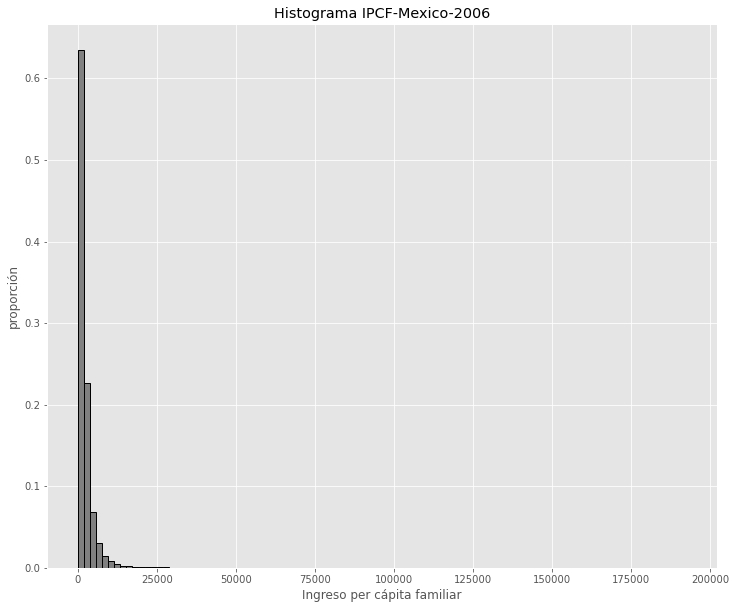

In [16]:
# Figura 2.2 - histograma ipcf
fig, ax = plt.subplots(figsize=(12, 10))
ax.hist(ipcf, bins=100, 
        weights=np.ones(len(pondera)) / len(pondera),
        color = "grey",
        ec="black", lw=1)

plt.ylabel("proporción")
plt.xlabel("Ingreso per cápita familiar")
plt.title("Histograma IPCF-Mexico-2006");

Con las líneas siguientes se filtra la base para individuos con *ipcf* menor a 15000 para evitar la típica distorsión generada por los valores extremos. Para realizar este filtro podríamos hacer algo similar al filtro que hicimos con las regiones de Brasil. Podríamos crear una variable nueva llamada `ipcf_temp` donde, a la condición de valores no nulos y no missings, le agregamos el requisito adicional de que el *ipcf* sea menor a 15000. Podríamos pensar en dos formas alternativas de hacer esto

- `ipcf_temp = df.ipcf[(df['ipcf'] != 0) & (pd.notna('ipcf')) & (df['ipcf'] < 15000)]`
- `ipcf_temp = df.loc[(df['ipcf'] != 0) & (pd.notna('ipcf')) & (df['ipcf'] < 15000), "ipcf"]`

La primera es similar a lo que veníamos implementando para filtar observaciones y quedarnos con una sola variable, mientras que la segunda podrá serles más familiar a usuarios de *R*, debido a que, a través de la función `loc()` de `pandas` le pedimos a *python* que tome las filas que cumplan las condiciones estipuladas a la izquierda de la coma `,` pero que solamente seleccione la columna *ipcf*, lo cual se indica en el segundo elemento a la derecha. Cualquiera de las opciones es recomendada, más cuando se pretende hacer un filtro de múltiples columnas. Para este simple ejercicio, como ya hemos extraído previamente *ipcf* del *dataframe*, optaremos por una tercera vía. En primer lugar, reutilizamos la variable *ipcf* (que cumple con las condiciones de valores no nulos y no *missings*) y le aplicamos el filtro de interés. Debido a que trabajaremos sobre las series ya separadas del dataframe lo que hacemos para *pondera* es filtrar la base con las filas que quedaron en *ipcf*, a partir del argumento `index`. Por supuesto, quedará en manos del lector probar los filtros explicados previamente para ver que cualquier camino conduce al mismo resultado. 

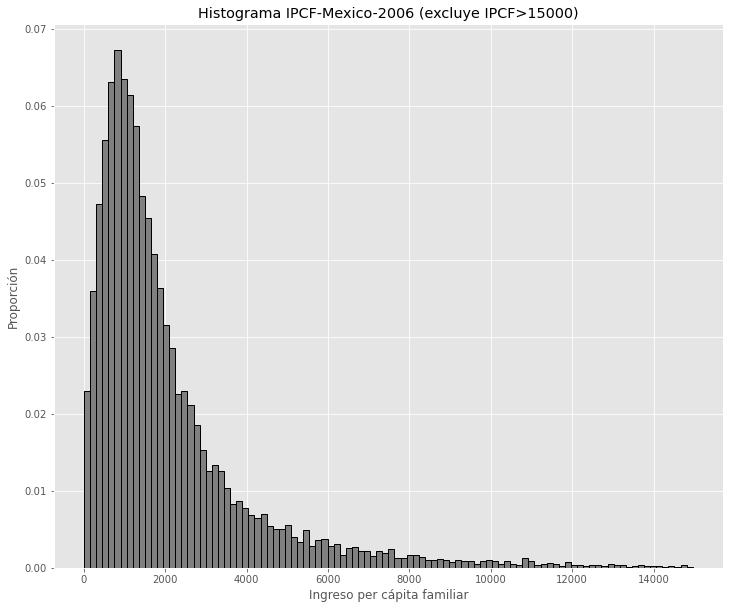

In [17]:
# Filtro
ipcf_temp = ipcf[ipcf < 15000]
pondera_temp = pondera[ipcf_temp.index]
# Figura 2.3 - histograma ipcf sin outliers
fig, ax = plt.subplots(figsize=(12, 10))
ax.hist(ipcf_temp, bins=100, stacked=True, 
        weights=np.ones(len(pondera_temp)) / len(pondera_temp),
        color = "grey",
        ec="black", lw=1)
plt.xlabel("Ingreso per cápita familiar")
plt.ylabel("Proporción")
plt.title("Histograma IPCF-Mexico-2006 (excluye IPCF>15000)")
plt.show();

Las figuras 2.4 y 2.5 del texto pueden replicarse haciendo lo siguiente. En el primer caso, transformamos el ipcf a logaritmos con la función `log()` de `NumPy`. Para el siguiente gráfico, se incrementa sucesivamente el número de barras del histograma. Para ello, podríamos repetir 4 veces el gráfico cambiando solamente la cantidad de bins. Sin embargo, como vimos en el caso del caso `describe()`, no resulta conveniente tener que repetir el bloque de códigos según cuantos bins queramos utilizar. Por lo que optamos por utilizar un *loop* o bucle que itera sobre el número de bins deseado. Por supuesto, el lector no familiarizado con los bucles puede optar por la opción de repetir el código cambiando el número de intervalos que desee, y si están interesados en introducirse en el método (lo cual verán que les ahorra mucho tiempo) pueden visitar [***W3Schools***](https://www.w3schools.com/python/python_for_loops.asp).

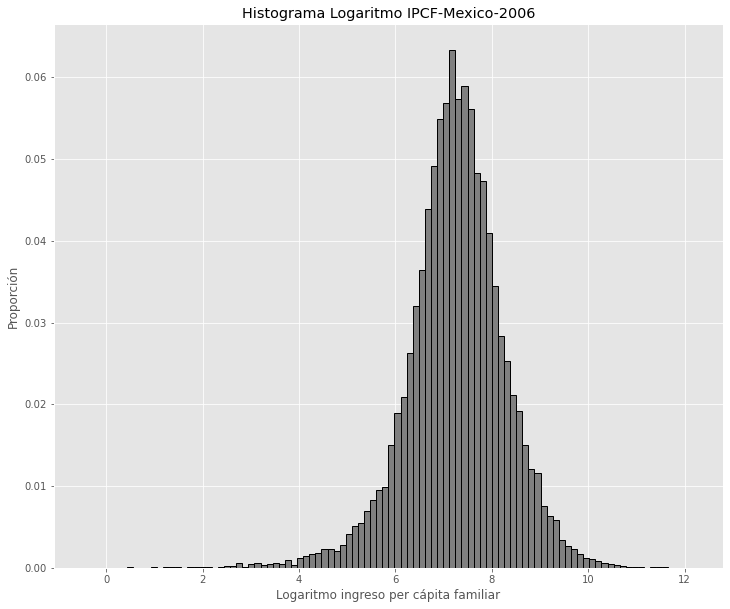

In [18]:
# Transformación logarítmica de ipcf
lipcf = np.log(ipcf)
# Figura 2.4 - histograma logaritmo del ipcf 
fig, ax = plt.subplots(figsize = (12, 10))
ax.hist(lipcf, bins = 100, 
        weights = np.ones(len(pondera)) / len(pondera),
        color = "grey",
        ec = "black", lw = 1)
plt.xlabel('Logaritmo ingreso per cápita familiar')
plt.ylabel("Proporción")
plt.title("Histograma Logaritmo IPCF-Mexico-2006")
plt.show();

Iteración 0: 10 intervalos
Iteración 1: 50 intervalos
Iteración 2: 100 intervalos
Iteración 3: 1000 intervalos


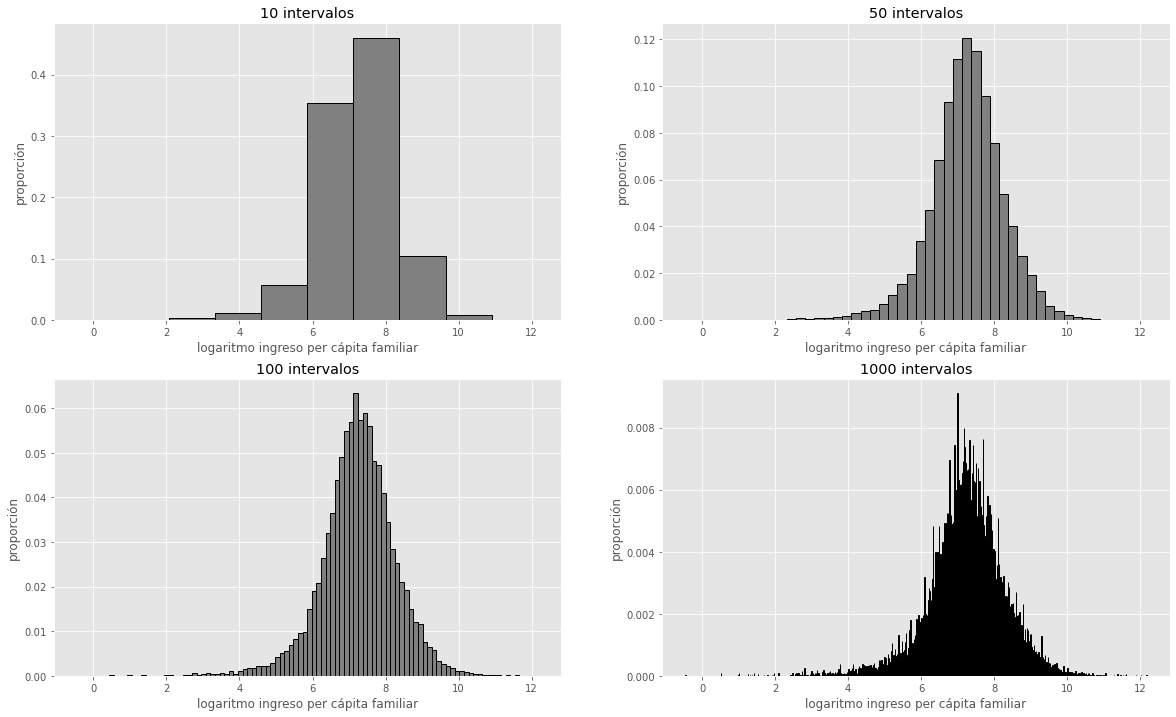

In [19]:
# Figura 2.5 - histogramas con diferente cantidad de intervalos
bins = [10, 50, 100, 1000]
fig=plt.figure(figsize=(20,12))
for i in range(0,4):
    print(style.green + f'Iteración {i}: {bins[i]} intervalos')
    ax=fig.add_subplot(2,2, i+1)
    ax.hist(lipcf, bins=bins[i], 
        weights=np.ones(len(pondera)) / len(pondera),
        color = "grey",
        ec="black", lw=1)
    plt.title(f'{bins[i]} intervalos')
    plt.xlabel("logaritmo ingreso per cápita familiar")
    plt.ylabel("proporción")

Las líneas que siguen grafican, superpuestos, los histogramas suavizados de las funciones de densidad del logaritmo del ipcf para las regiones Noroeste y Sur de México. Para ello, nos moveremos hacia la librería `seaborn`, interface basada en `matplotlib` para generar visualizaciones de una manera sencilla. A diferencia de `matplotlib`, en el caso gráficos de histogramas suavizados, `sns.kdeplot()` de `seaborn` admite el factor de expansión para generar los gráficos, por lo que se considera más adecuado mudarse a dicha librería para el resto de funciones que restan por hacer en este apartado. Si les interesa saber más acerca de la librería, pueden ir a [***seaborn***](https://seaborn.pydata.org/). 

Como se puede ver en los argumentos de `sns.kdeplot()`, el argumento `hue` le dice a *python* que considere el cálculo de densidades por separado según las categorías dentro de *region*, que en nuestro caso hemos realizado un filtro para quedarnos solamente con el Sur y Noroeste. Los demás argumentos responden a una cuestión estética. Se configura el color de manera manual a través del argumento `palette`, creando previamente una lista llamada también *palette* con dos colores exportados manualmente de [***ColorBrewer***](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3) y se rellenan ambas áreas con `fill`. Por último, cabe aclarar que se desactiva `common_norm` que escala cada densidad por el número de observaciones tal que el área total de ambas densidades sume 1. 

A su vez, definimos el objeto *lp* que contiene el valor de la línea de pobreza internacional de USD 2.5 por día por persona convertido a pesos mexicanos (en log), que marcamos como una línea vertical en el grafico con `plt.axvline()`. Como se puede ver, `seaborn` al ser una especie de ramificación de `matplotlib` logra la compatibilidad con este último. 

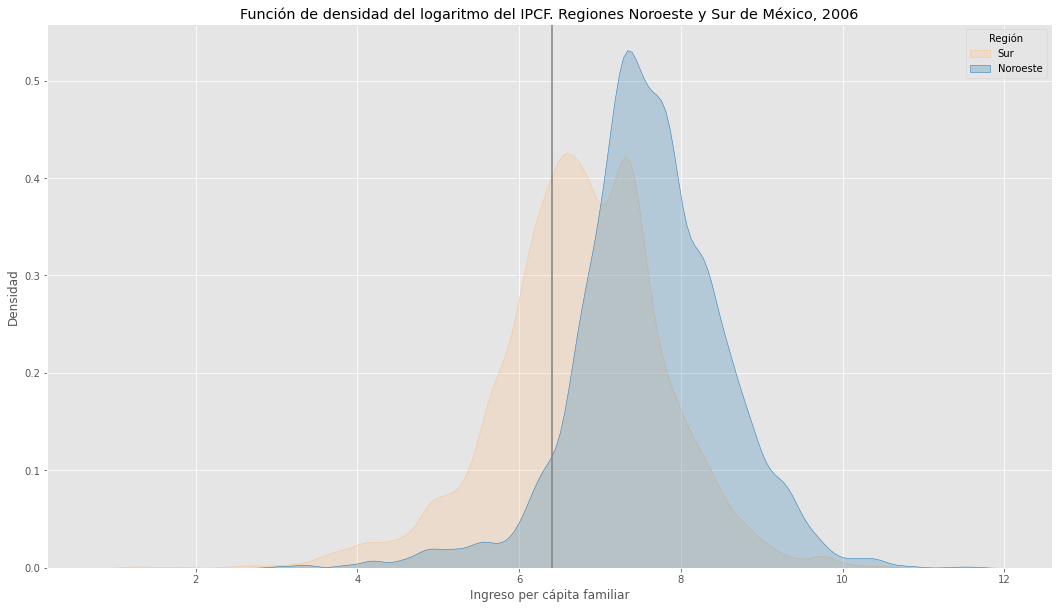

In [20]:
pd.options.mode.chained_assignment = None  # recurso para ignorar warnings. Recomendado cuando es esperable un warning que no queremos mostrarlo porque no afecta los resultados

# Seteo de la línea de pobreza a graficar verticalmente
lp = np.log(608.425)

# Create an array with the colors you want to use
palette = ['#1f78b4','#fdc086']

# Filtro de regiones y transformación logarítmica
df_temp = df[(df['region'] == 1) | (df['region'] == 6)]
df_temp.loc[:,'lipcf'] = np.log(df_temp['ipcf']+1)

## Figura 2.7 - histogramas superpuestos por regiones
fig, ax = plt.subplots(figsize=(18,10))
sns.kdeplot(data=df_temp, x=lipcf, hue='region',  
            fill=True, palette=palette, bw_method=0.15, 
            common_norm=False, weights = pondera)
ax.set(xlabel='Ingreso per cápita familiar', ylabel='Densidad', 
       title='Función de densidad del logaritmo del IPCF. Regiones Noroeste y Sur de México, 2006')
plt.legend(title='Región', labels=['Sur', 'Noroeste'])
plt.axvline(x = lp, color = 'grey');

Notar que en la transformación logarítmica del *ipcf* sumamos un 1 a la variable antes de transformarlo. Debido a que extraemos nuevamente la variable del *dataframe* la misma contiene valores nulos, por lo que para no obtener valores infinitos le aplicamos la transformación monónota `+1`, para que el logaritmo de los valores nulos termine siendo cero. Por supuesto, la misma responde a una opción alternativa a sacar los valores nulos directamente, antes de trabajar con *ipcf*. 

Una de las ventajas de estos histogramas suavizados es facilitar las comparaciones. Como puede verse, las dos distribuciones son claramente diferentes. La distribución del Sur está desplazada a la izquierda, lo que sugiere que en general los individuos de esa región tienen menores ingresos que en el Noroeste y por lo tanto una densidad mayor caerá por debajo de la línea de pobreza fijada en esa región.

Por último, siguiendo la figura 2.6 y 2.8, se presenta un histograma con una versión "suavizada" del mismo en línea continua, calculado a través del método de kernels de la función. Posteriormente, repetimos el histograma anterior pero cambiamos la versión suavizada por el de una distribución normal con media y varianza idénticas a las de los datos reales. 

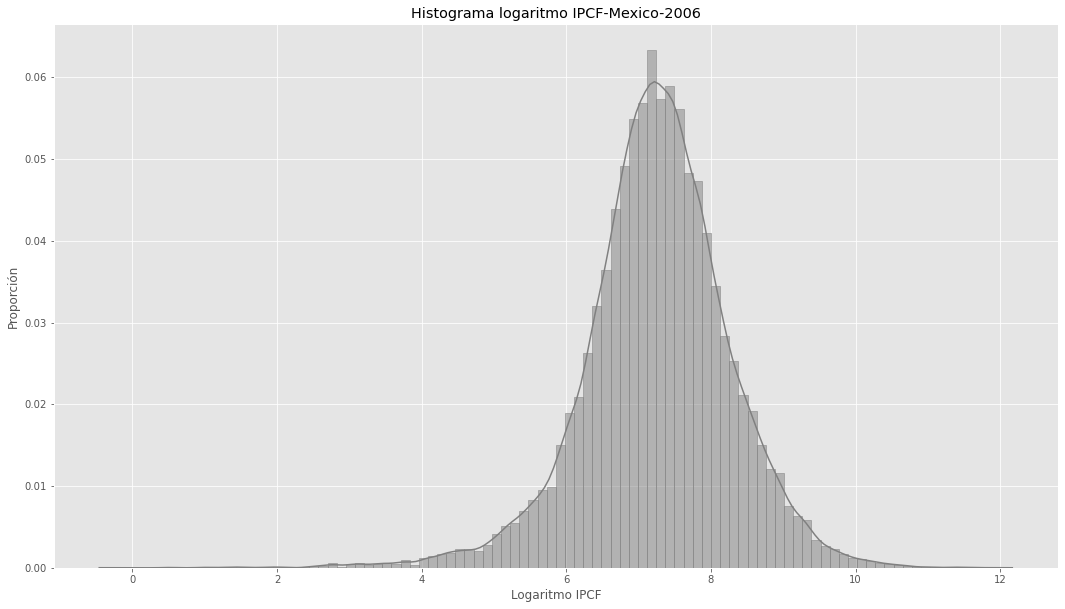

In [21]:
## Figura 2.6 - histogramas superpuestos por regiones
fig, ax = plt.subplots(figsize=(18, 10))
sns.histplot(x=lipcf, bins=100, 
            weights=np.ones(len(pondera)) / len(pondera),
            color = 'grey',
            ec="grey", kde=True, 
            stat='proportion')
plt.xlabel("Logaritmo IPCF")
plt.ylabel("Proporción")
plt.title("Histograma logaritmo IPCF-Mexico-2006")
plt.show();

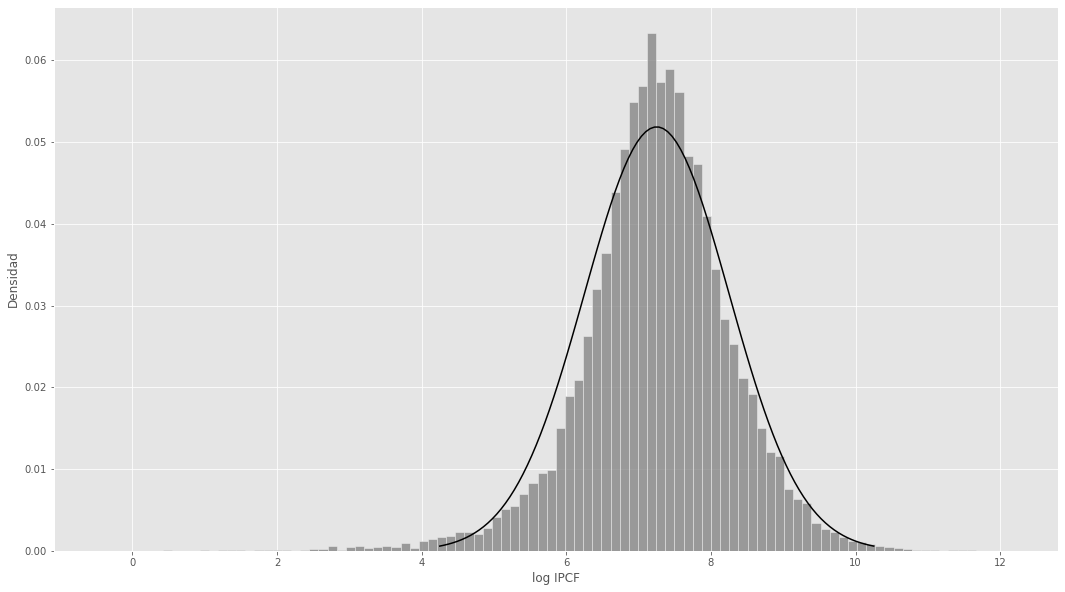

In [22]:
# Graficamos la densidad estimada superpuesta con una distribucion normal teorica

mu, sigma = lipcf.mean(), 1
s = np.random.normal(mu, sigma, lipcf.count())

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Figura 2.8 - histograma del ICPF y su distribución normal
fig, ax = plt.subplots(figsize=(18,10))
sns.histplot(x = lipcf , weights= np.ones(len(pondera)) / len(pondera), 
             bins = 100, 
             stat = 'proportion', color='grey')
plt.plot(x, stats.norm.pdf(x, mu, sigma)*0.13, color = 'black')

plt.xlabel("log IPCF")
plt.ylabel("Densidad")
plt.show()

## 2.3 Función de distribución

[***Página 77***](https://drive.google.com/file/d/1MwQrMylnYL0VHrLRM3JafsCBE9NkisAJ/view)

En este apartado se muestra cómo pueden graficarse las funciones de distribución presentadas en la sección 2.3.2 del cuerpo principal del capítulo. El primer paso para construir una función de distribución es ordenar (de menor a mayor) las observaciones de la encuestas, según la variable de ingreso elegida, *ipcf* en nuestro caso. Esto lo hacemos en la primera línea con la función `sort_values()`. En la línea siguiente se crea la variable *shrpop* para almacenar la proporción relativa acumulada de la variable pondera, es decir, el porcentaje acumulado de la población que representa cada observación junto con todas las anteriores. Así, la variable *shrpop* tendrá un valor de 100 para la última observación. Para obtener la suma acumulada expandida empleamos `cumsum()` y lo dividimos por el total de población expandida que se obtiene con `sum()`. La función de distribución de la Figura 2.9 presenta las variables *shrpop* e *ipcf* en los ejes vertical y horizontal, respectivamente, como se indica en `plt.plot()`.

In [23]:
# Ordenamos las observaciones de la base de acuerdo al IPCF
df = df.sort_values(by=['ipcf'])
# Agregamos una columna que muestre la proporcion del ingreso que acumula cada individuo
df["shrpop"] = df.pondera.cumsum()/df.pondera.sum() 
# Creamos vectores para graficar
shrpop = df["shrpop"]
ipcf = df["ipcf"]

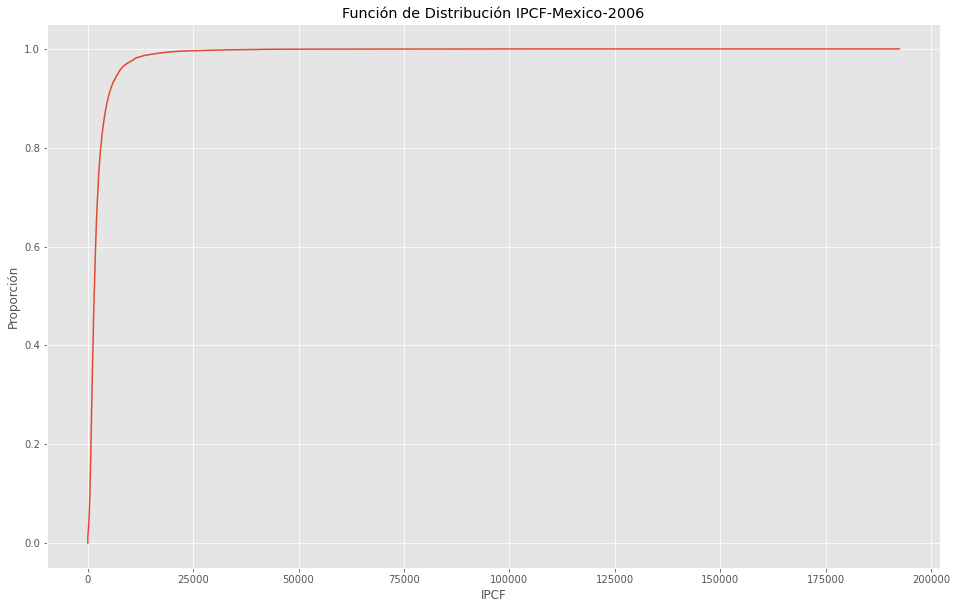

In [24]:
# Figura 2.9 - función de distribución acumulada
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(ipcf, shrpop)
plt.xlabel("IPCF")
plt.ylabel("Proporción")
plt.title("Función de Distribución IPCF-Mexico-2006")
plt.show()

Nuevamente, la cola superior larga de la distribución vuelve al gráfico poco útil. Para resolver este problema las alternativas son dos. Primero, podríamos truncar los valores superiores del ingreso. Segundo, trabajar en logaritmos. La figura 2.10 muestra ambas alternativas. Para la primera, calculamos el ingreso del percentil 95 y en base a este umbral filtramos las observaciones. En el segundo caso, transformamos a logaritmo el ingreso per cápita familiar, realizando un filtro previo de valores no nulos. 

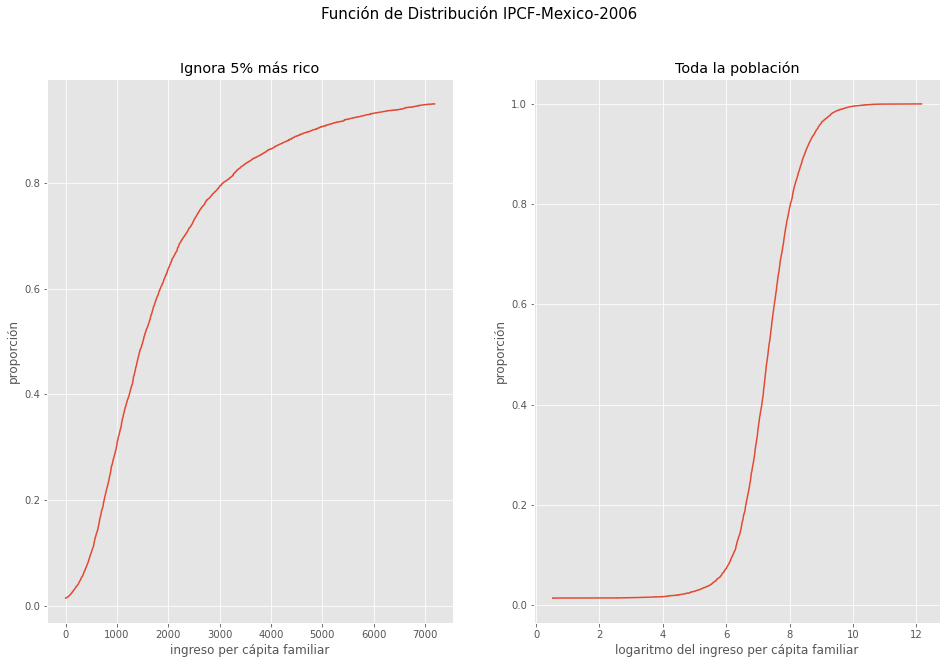

In [25]:
# Replicamos el gráfico pero excluyendo al 5% mas rico
shrpop_95 = df.shrpop[(df['shrpop'] <= 0.95) & (df['ipcf']>0)]
ipcf_95 = df.ipcf[(df['shrpop'] <= 0.95) & (df['ipcf']>0)]
lipcf = np.log(ipcf[ipcf>1])
shrpop = shrpop[lipcf.index] 

# Figura 2.10 función de distribución acumulada sin outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
ax[0].plot(ipcf_95, shrpop_95)
ax[0].set_xlabel("ingreso per cápita familiar")
ax[0].set_ylabel("proporción")
plt.suptitle("Función de Distribución IPCF-Mexico-2006", fontsize=15)
ax[0].set_title("Ignora 5% más rico")
ax[1].plot(lipcf, shrpop)
ax[1].set_xlabel("logaritmo del ingreso per cápita familiar")
ax[1].set_ylabel("proporción")
ax[1].set_title("Toda la población");

Se deja como ejercicio para el lector elaborar las otras funciones de distribución presentadas en la sección 2.3.2. Por su parte, la curva de Pen (ver figuras 2.12 y 2.13) se construye igual que la función de distribución pero se grafica invirtiendo los ejes.

## 2.4 Diagrama de Pareto

[***Página 78***](https://drive.google.com/file/d/1MwQrMylnYL0VHrLRM3JafsCBE9NkisAJ/view)

En esta sección se muestra cómo replicar la figura 2.14 del texto, que muestra los diagramas de Pareto para las regiones Noroeste y Sur de México. El procedimiento es muy similar al caso de la función de distribución ya que en esencia representan lo mismo, aunque desde una mirada alternativa. El gráfico de Pareto muestra para cada valor del ingreso *x* el porcentaje de la población que recibe ingresos superiores a ese valor *x*, en una escala doble logarítmica. El cambio de escala genera una suerte de zoom óptico sobre los estratos de mayores ingresos, permitiendo un examen más detallado de esa parte de la distribución.

Para graficarlo seguimos los pasos anteriores, pero ahora ordenamos a la población por ingreso dentro de cada región y ya no considerando el total país. Para ello agrupamos las observaciones por región con `groupby()` previo a calcular el *share* acumulado, de forma tal que este cálculo se haga solo entre individuos de una misma región, a partir de la función `apply()` creamos la variable *shrpop_region*. La función junto con el argumento `lambda` permite crear funciones matemáticas "anónimas". Para quien esté familiarizado con R, podría ser una suerte de `mutate()` de `dplyr`. Más información de la función puede encontrarse en [***pandas.DataFrame.apply***](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) y [***ejemplos***](https://sparkbyexamples.com/pandas/pandas-apply-with-lambda-examples/#:~:text=apply()%20can%20be%20used,arguments%20and%20execute%20an%20expression.). 

En las siguientes líneas generamos dos variables. La primera es el logaritmo del *ipcf*, que va a ser el vector a graficar. En segundo lugar, la variable *lpareto*, que generamos a partir de la variable *shrpop_region*. Finalmente, se grafica filtrando la base para las regiones de interés y, siguiendo la misma lógica empleada en el gráfico de densidad superpuesta, a través de `matplotlib` con `ax.plot()` para ambas regiones.

In [26]:
warnings.filterwarnings("ignore", message="divide by zero encountered in log") # ignorar si aparece advertencia de valores infinitos

# Ordenamos las observaciones por region e IPCF
df = df.sort_values(by=["region", "ipcf"])

# Definimos el logaritmo del IPCF
df["lipcf"] = np.log(df["ipcf"]+1)

# Definimos la variable con la proporcion del ingreso acumulada por individuo pero por region
# df['pop_region'] = df.groupby(by=["region"])['pondera'].cumsum()
df['shrpop_region'] = df.groupby(['region'], group_keys=False).apply(lambda x: x.pondera.cumsum()/x.pondera.cumsum().max())

# for i in np.unique(df["region"]):
#    aux = df.loc[df["region"] == i,'shrpop'].max() 
#    df.loc[df["region"] == i,'shrpop'] = df["shrpop"] / aux

# Añadimos una columna con la variable para graficar la curva
# aux = 1 - df["shrpop_region"]
df["lpareto"] = np.log(1 - df["shrpop_region"])

# Creamos dos submuestras con las observaciones de las regiones Noroeste y Sur
df_1 = df.loc[df["region"] == 1]
df_6 = df.loc[df["region"] == 6]

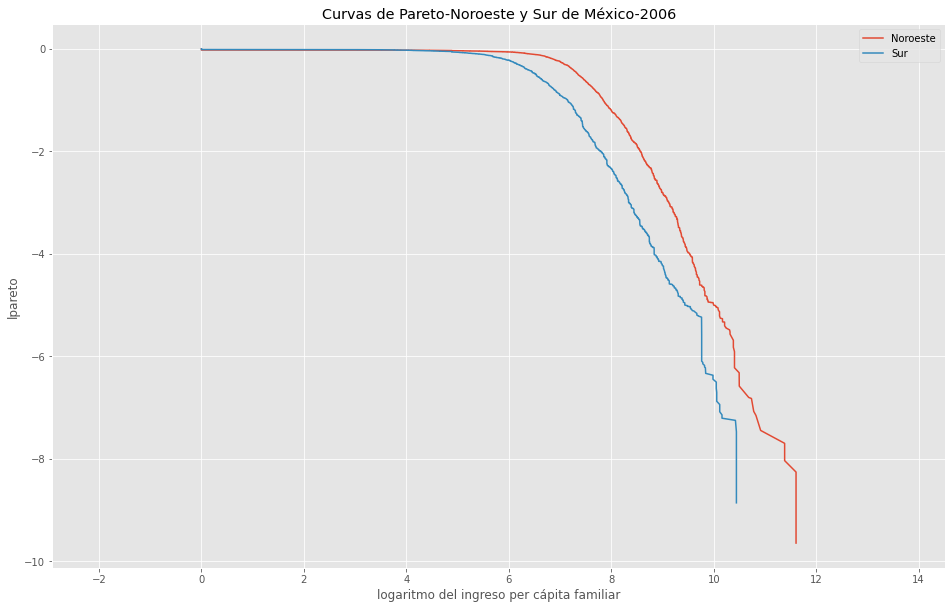

In [27]:
# Figura 2.14 - Diagrama de Pareto
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(df_1["lipcf"], df_1["lpareto"], label='Noroeste')
ax.plot(df_6["lipcf"], df_6["lpareto"], label = 'Sur')
ax.axis("equal")
leg = ax.legend()
plt.title('Curvas de Pareto-Noroeste y Sur de México-2006')
plt.ylabel('lpareto')
plt.xlabel('logaritmo del ingreso per cápita familiar');

Las líneas siguientes repiten el ejercicio pero dejando de lado al 1% más rico de la poblacion en cada región. Aquí en vez de filtrar en base al valor de ingresos, lo hacemos en base al porcentaje acumulado, como alternativa al caso anterior. Denominamos *cutoff* como el punto de corte y filtramos todos los valores cuyo *shrpop* sea menor a dicho umbral. 

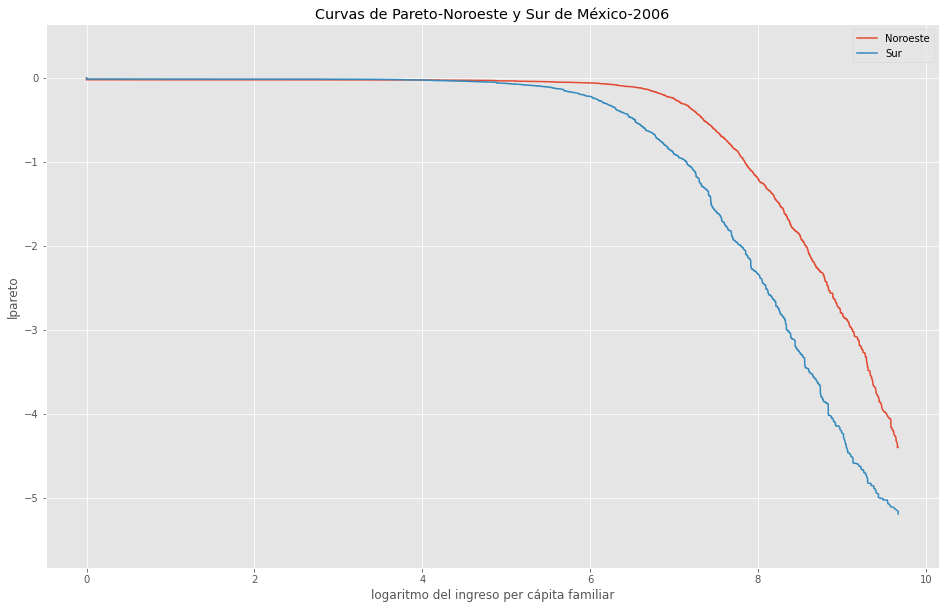

In [28]:
# Replicamos las curvas pero excluyendo al 1% mas rico de la poblacion de cada region
cutoff = 0.99
df_1 = df_1.loc[(df_1["shrpop"] < cutoff)]
df_6 = df_6.loc[(df_6["shrpop"] < cutoff)]

# Gráfico - Diagrama de Pareto
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(df_1["lipcf"], df_1["lpareto"], label='Noroeste')
ax.plot(df_6["lipcf"], df_6["lpareto"], label = 'Sur')
ax.axis("equal")
leg = ax.legend()
plt.title('Curvas de Pareto-Noroeste y Sur de México-2006')
plt.ylabel('lpareto')
plt.xlabel('logaritmo del ingreso per cápita familiar');

## 2.5 Box-Plot

[***Página 79***](https://drive.google.com/file/d/1MwQrMylnYL0VHrLRM3JafsCBE9NkisAJ/view)

Aquí se muestra cómo elaborar diagramas de caja o box-plot como los presentados en la sección 2.3.5 del texto. El problema con las librerías de boxplot disponibles es que no permiten la inclusión de factores de expansión, por lo que para graficar primero creamos nuestra propia función para computar los valores necesarios para armar el gráfico. La función se llama `box_plotInput()` y dentro calcula en primer lugar los percentiles ponderados, bajo un método de interpolación lineal similar al que construimos en la [**Sección 2.1**](#2.1-Introducción:-ejemplo-Brasil), donde utilizamos el método [***weighted percentile method***](https://en.wikipedia.org/wiki/Percentile#Definition_of_the_Weighted_Percentile_method). A partir de los cuartiles necesarios la función calcula el rango intercuartílico de la serie de interés, y luego pasa a calcular los límites inferior y superior del diagrama. 

In [29]:
def box_plotInput(x, percents, weights=None):
    # Definimos una funcion para calcular cuantiles ponderados
    def weighted_percentile(data, percents, weights=None): 
        if weights is None:
            return np.percentile(data, percents)
        ind=np.argsort(data)
        d=data[ind]
        w=weights[ind]
        p=1.*w.cumsum()/w.sum()*100
        y=np.interp(percents, p, d)
        return y
    box_plotInput = {}
    for p in percents:
        box_plotInput["p{0}".format(p)] = weighted_percentile(x, p, weights=weights)
    # Definimos el rango intercuartilico
    iqr=box_plotInput['p75']-box_plotInput['p25'] 

    # Definimos limites inferior y superior
    box_plotInput["mini"]= box_plotInput['p25']  - 1.5*iqr

    if box_plotInput["mini"]<0:
        box_plotInput["mini"]=0

    box_plotInput["maxi"]= box_plotInput['p75']  + 1.5*iqr
    return box_plotInput

Con la función definida pasamos a extraer los vectores de interés, esto es, el *ipcf* y el factor de expansión *pondera*, con un previo ordenamiento en base al índice (utilizando `sort_index()`) para volver al order original de la base. Luego, con nuestra función custom `box_plotInput()` obtenemos los inputs necesarios para graficar. Así, pasamos a graficar la Figura 2.15 con `matplotlib`. Se visualizan tanto el ipcf en valores reales (panel izquierdo) como su transformación logarítmica (panel derecho).

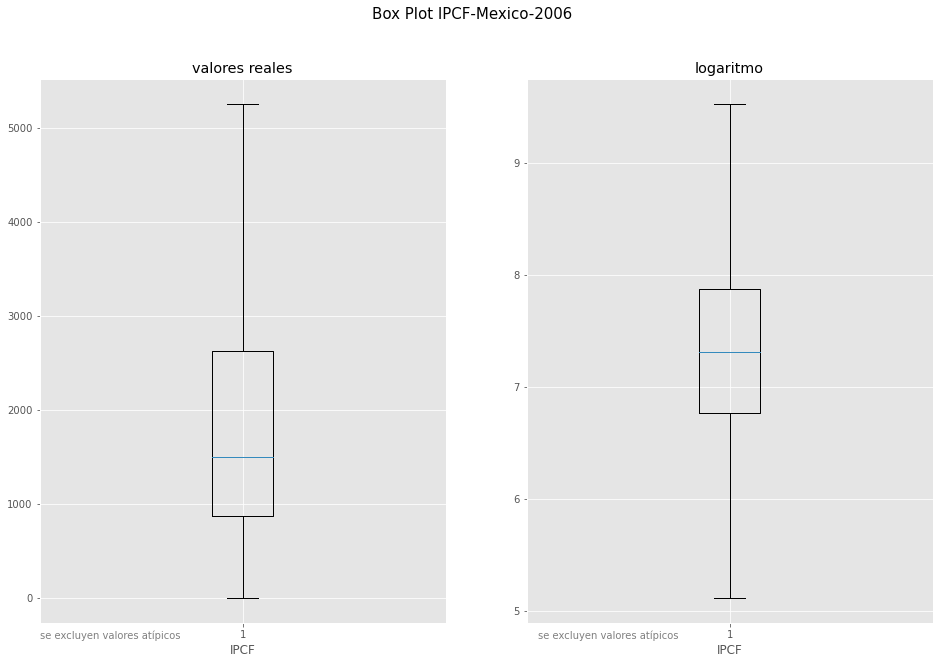

In [30]:
# Extraemos los datos del IPCF y los ponderadores y los convertimos en vectores para graficar
df = df.sort_index()
ipcf=df["ipcf"]
pondera= df["pondera"]

## Generamos input para boxplot con nuestra función custom
# valores reales
inputs = box_plotInput(ipcf, [25, 50, 75], pondera)
box_ipcf = list(inputs.values())
# logaritmo
lipcf=np.log(df["ipcf"]+1)
inputs_log = box_plotInput(lipcf, [25, 50, 75], pondera)
box_ipcf_log = list(inputs_log.values())

## Figura 2.15 - Box Plot excluyendo outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))
ax[0].boxplot(box_ipcf, showfliers=True)
ax[0].set_xlabel("IPCF")
ax[0].text(0,-0.03,s="se excluyen valores atípicos", size=10, ha="left", 
         transform=ax[0].transAxes, color='grey')
plt.suptitle("Box Plot IPCF-Mexico-2006", fontsize=15)
ax[0].set_title("valores reales")

ax[1].boxplot(box_ipcf_log, showfliers=True)
ax[1].set_xlabel("IPCF")
ax[1].text(1.4,-0.03,s="se excluyen valores atípicos", size=10, ha="center", 
         transform=ax[0].transAxes, color='grey')
ax[1].set_title("logaritmo");

Posteriormente, repetimos el ejercicio para las regiones Noroeste y Sur de México (Figura 2.17 del texto), pero utilizando la librería de visualización `seaborn`. Notar también que para la Figura 2.17 no necesitamos generar `ax` como lo veníamos hacendo, ya que lo generamos directamente desde `sns.boxplot()` de `seaborn`.   

In [31]:
## Construimos graficos del log del IPCF por separado para las regiones Noroeste y Sur
# Creamos elementos necesarios para el grafico del Noroeste
df_1 = df[df['region'] == 1].copy()
lipcf_1=np.log(df_1["ipcf"]+1)
lipcf_1=lipcf_1.reset_index(drop=True)
pondera_1 = df_1['pondera']
pondera_1=pondera_1.reset_index(drop=True)
inputs_1 = box_plotInput(lipcf_1, [25, 50, 75], pondera_1)
box_ipcf_1 = list(inputs_1.values())

# Creamos elementos necesarios para el grafico del Sur
df_6 = df[df['region'] == 6].copy()
lipcf_6=np.log(df_6["ipcf"]+1)
lipcf_6=lipcf_6.reset_index(drop=True)
pondera_6 = df_6['pondera']
pondera_6=pondera_6.reset_index(drop=True)
inputs_6 = box_plotInput(lipcf_6, [25, 50, 75], pondera_6)
box_ipcf_6 = list(inputs_6.values())
del [df_1, df_6]

# Unimos ambas regiones para graficar
box_df = pd.DataFrame({'Noroeste': box_ipcf_1,
                       'Sur': box_ipcf_6})  

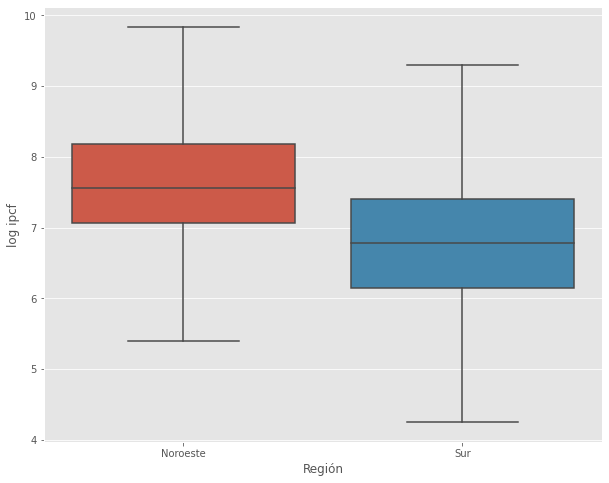

In [32]:
## Figura 2.17  - Box Plot en log por regiones con outliers
plt.figure(figsize=(10,8))
sns.boxplot(x='variable', y='value', data=pd.melt(box_df)).set(
            xlabel='Región', 
            ylabel='log ipcf');

Por último, repetimos los box-plots para ambas regiones, considerando las observacioens atípicas. No obstante, para este caso utilizamos la función `boxplot()` de `matplotlib` directamente, por lo que no utilizamos ponderadores. 

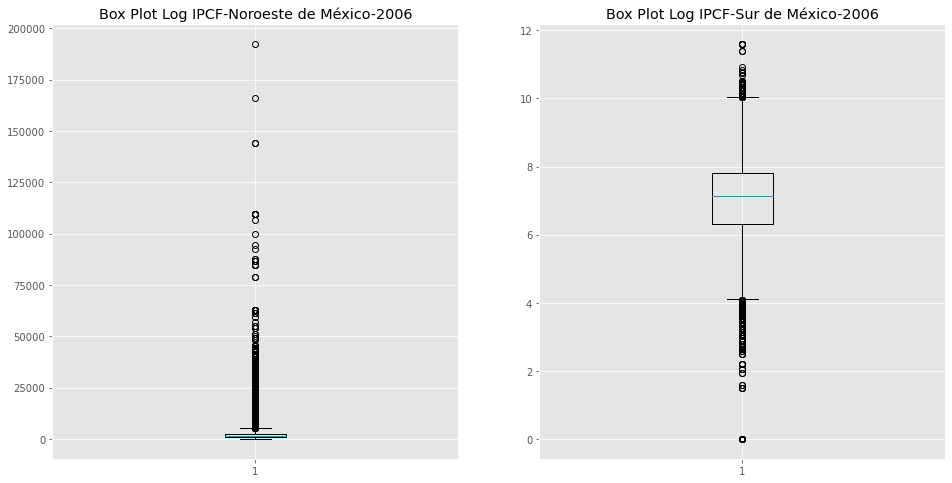

In [33]:
# Construimos los mismos graficos pero incluyendo los outliers (no utilizamos ponderadores)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.boxplot(df['ipcf'], showfliers=True)
plt.title("Box Plot Log IPCF-Noroeste de México-2006")
plt.subplot(122)
plt.boxplot(df_temp['lipcf'], showfliers=True)
plt.title("Box Plot Log IPCF-Sur de México-2006")
plt.show;

## 2.6 Curva de Lorenz

[***Página 80***](https://drive.google.com/file/d/1MwQrMylnYL0VHrLRM3JafsCBE9NkisAJ/view)

En este apartado se muestra cómo pueden construirse las curvas de Lorenz introducidas en la sección 2.3.6 del capítulo. El primer paso consiste en ordenar a los individuos de menor a mayor según su ingreso (en nuestro caso contenido en la variable *ipcf*) y contemplando el orden del factor de expansión. Las líneas siguientes generan la variable *shrpop* de la misma forma en la que fue generada más arriba, estimando la proporción de la población que se acumula hasta cada observación de la encuesta. La diferencia es que ahora también generaremos una variable *shrinc* que contiene la proporción del ingreso que se acumula hasta cada observación y que se estima expandiendo el ingreso por el ponderador, es decir multiplicando ambas columnas, como puede verse en el código.

In [34]:
#Ordenamos las observaciones segun el IPCF y el ponderador
df = df.sort_values(by=["ipcf","pondera"])
#Añadimos una columna con la proporción acumulada que representa cada individuo del total de la población
df["shrpop"] = df["pondera"].cumsum()
shr_N =df["pondera"].sum()
df["shrpop"] =df["shrpop"] / shr_N
#Añadimos una variable análoga pero con el ingreso acumulado
df["shrinc"] = (df["ipcf"]*df["pondera"]).cumsum()
shr_N = (df["ipcf"]*df["pondera"]).sum()
df["shrinc"] = df["shrinc"] / shr_N

La curva de Lorenz nos muestra qué porcentaje de la población acumula un porcentaje dado del ingreso total. Para visualizarlo indicamos entonces los ejes respectivos para *shrpop* y *shrinc* a la función `plot()` de `matplotlib`, como también, graficamos la línea de perfecta igualdad.

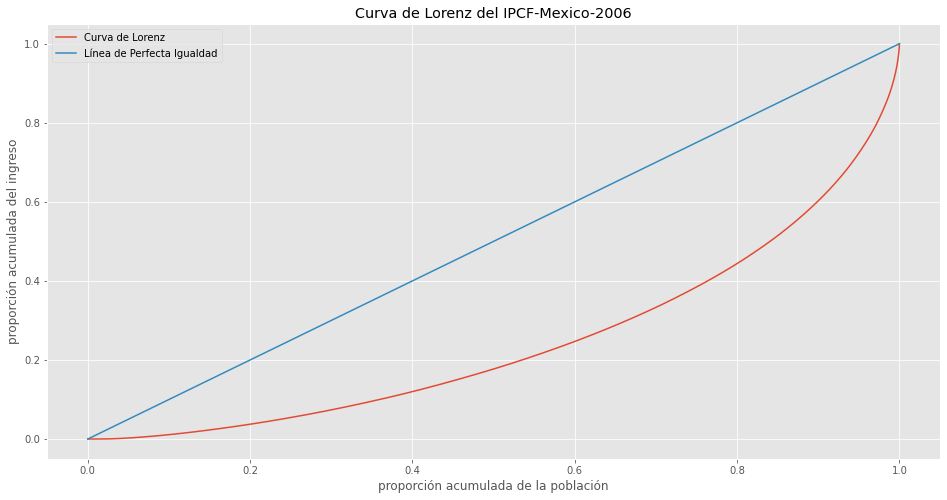

In [35]:
# Figura 2.18 - curva de Lorenz 
plt.figure(figsize=(16,8))
plt.plot(df["shrpop"],df["shrinc"], label ="Curva de Lorenz")
plt.xlabel("proporción acumulada de la población")
plt.ylabel("proporción acumulada del ingreso")
plt.plot([0,1], [0,1], label = "Línea de Perfecta Igualdad")
plt.legend()
plt.title("Curva de Lorenz del IPCF-Mexico-2006")
plt.show()

En las líneas siguientes se comparan las curvas de Lorenz para las dos regiones de México que venimos analizando. El código sigue los mismos pasos que antes pero ahora los cálculos de población e ingreso acumulado se realizan a partir `groupby()` de `pandas` para diferenciar regiones. Mientras que *shrpop* y *shrinc* se calculan a partir de bucles sobre cada región.

In [36]:
# Definimos variable de proporcion de poblacion acumulada en cada region
df['shrpop'] = df.groupby(by=["region"])['pondera'].cumsum()

for i in np.unique(df["region"]): 
   aux2 = df.loc[df["region"] == i,'shrpop'].max() 
   df.loc[df["region"] == i,'shrpop'] = df["shrpop"] / aux2

# Definimos variable analoga pero con el ingreso acumulado por region
df["aux"]= df["ipcf"]*df["pondera"]
df['shrinc'] = df.groupby(by=["region"])['aux'].cumsum()

for i in np.unique(df["region"]):
   aux2 = df.loc[df["region"] == i,'shrinc'].max() 
   df.loc[df["region"] == i,'shrinc'] = df["shrinc"] / aux2

# Definimos los elementos necesarios para graficar    
df_1 = df.loc[df["region"] == 1]
df_1 = df_1.sort_values(by=["shrinc"])
df_6 = df.loc[df["region"] == 6]
df_6 = df_6.sort_values(by=["shrinc"])

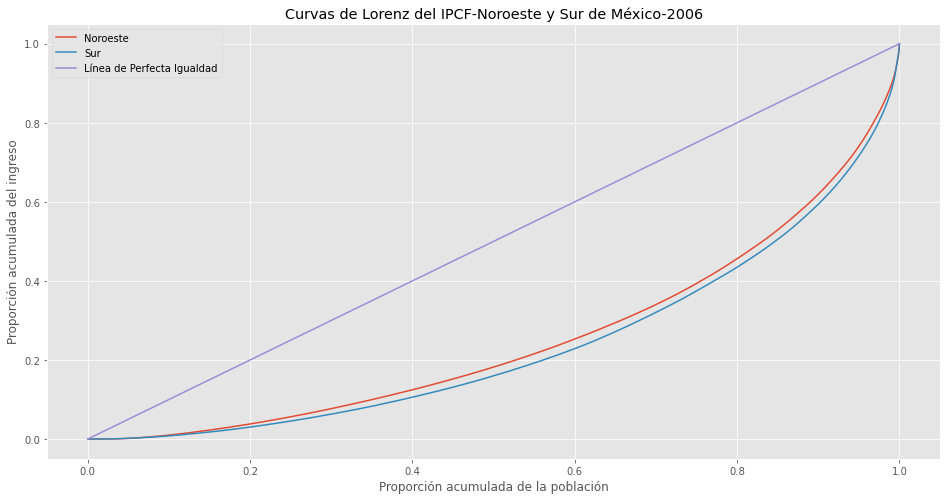

In [37]:
# Figura 2.19 - curva de lorenz por regiones
plt.figure(figsize=(16,8))
plt.plot(df_1["shrpop"],df_1["shrinc"], label='Noroeste')
plt.plot(df_6["shrpop"],df_6["shrinc"], label='Sur')
plt.xlabel("Proporción acumulada de la población")
plt.ylabel("Proporción acumulada del ingreso")
plt.plot([0,1], [0,1], label='Línea de Perfecta Igualdad')
plt.legend()
plt.title("Curvas de Lorenz del IPCF-Noroeste y Sur de México-2006")
plt.show()

## 2.7 Curva Generalizada de Lorenz

[***Página 81***](https://drive.google.com/file/d/1MwQrMylnYL0VHrLRM3JafsCBE9NkisAJ/view)

La curva generalizada de Lorenz se construye a partir de la curva de Lorenz pero multiplicando su eje vertical por el ingreso promedio (ver sección 2.3.6 en el cuerpo del capítulo). Las líneas de código no se modifican respecto de las utilizadas para estimar la curva de Lorenz, salvo en que ahora la variable *shrpop* la generamos sobre la base de la variable *pondera*. Para entender el álgebra detrás de esta forma de calcular la curva generalizada de Lorenz, el lector puede remitirse a los apéndices del libro (pagina 81-82) donde queda claramente explicitado. Recordar que la curva generalizada de Lorenz muestra el ingreso acumulado en el x% más pobre de la población, sobre el número de personas. Como quedará mas claro en los capítulos 6 y 7, mientras que la curva de Lorenz se emplea para estudiar desigualdad, la generalizada de Lorenz es muy útil para analizar bienestar agregado.

In [38]:
# Definimos variable de proporcion de poblacion acumulada en cada region
df['shrpop'] = df.groupby(by=["region"])['pondera'].cumsum()
df['pop'] = df['shrpop']

for i in np.unique(df["region"]):
   aux2 = df.loc[df["region"] == i,'shrpop'].max() 
   df.loc[df["region"] == i,'shrpop'] = df["shrpop"] / aux2

# Definimos la variable correspondiente a la curva generalizada de Lorenz
df["aux"]= df["ipcf"]*df["pondera"]
df['glorenz'] = df.groupby(by=["region"])['aux'].cumsum()

for i in np.unique(df["region"]):
   aux2 = df.loc[df["region"] == i,'pop'].max() 
   df.loc[df["region"] == i,'glorenz'] = df["glorenz"] / aux2

# Definimos los elementos necesarios para graficar    
df_1 = df.loc[df["region"] == 1]
df_6 = df.loc[df["region"] == 6]

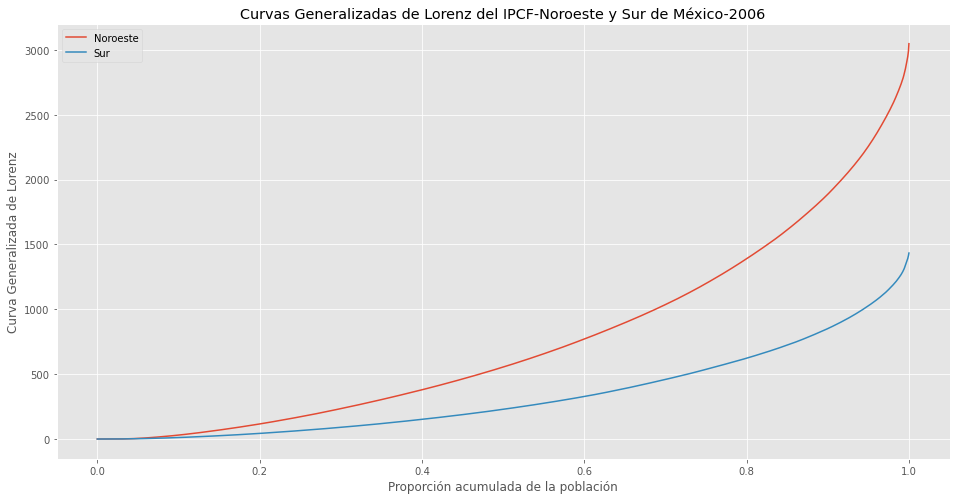

In [39]:
# Figura 2.20 - curva de Lorenz generalizada por regiones
plt.figure(figsize=(16,8))
plt.plot(df_1["shrpop"],df_1["glorenz"], label='Noroeste')
plt.plot(df_6["shrpop"],df_6["glorenz"], label='Sur')
plt.xlabel("Proporción acumulada de la población")
plt.ylabel("Curva Generalizada de Lorenz")
plt.legend()
plt.title("Curvas Generalizadas de Lorenz del IPCF-Noroeste y Sur de México-2006")
plt.show()

## 2.8 Curva de incidencia del crecimiento

[***Página 83***](https://drive.google.com/file/d/1MwQrMylnYL0VHrLRM3JafsCBE9NkisAJ/view)

En este apartado se muestra cómo pueden estimarse las curvas de incidencia del crecimiento que aparecen en la figura 2.21 del texto. A modo de ejemplo, se computa la curva de incidencia del crecimiento para Argentina entre 1992 y 2006, utilizando percentiles del ingreso per cápita familiar. A continuación, cargamos ambas bases, esto es, la EPH puntual de 1992 y la del segundo semestre de 2006. Para el primer caso, la forma de importar el *dataset* es diferente. Debido a que el archivo no se encuentra en la página del cedlas, lo obtenemos desde *google drive* a partir del procedimiento que se muestra a continuación. Creamos una variable llamada *aux* que contiene el enlace de descarga. Posteriormente, la variable *link* se conforma de una parte estándar para descargar archivos a partir del *id* de los archivos, más una segunda parte que identifica el id dentro de *aux*. Con el enlace *link* establecido, pasamos a importar el *.dta* con `read_stata()`, pero solamente seleccionando las columnas que nos interesa, con el argumento `columns`. 

In [40]:
# descargamos el archivo zip de eph puntual 1992
aux = "https://drive.google.com/file/d/1ICi2BF3YkQt2a_fBkxt00CV1_ipmsEIP/view?usp=sharing"
link ='https://drive.google.com/uc?id=' + aux.split('/')[-2]
df_92 = pd.read_stata(link, columns=['ipcf', 'pondera', 'region', 'cohh']) # nos quedamos con las columnas de interés

C:\Users\USUARIO\AppData\Roaming\Python\Python39\site-packages\pandas\io\stata.py:1457: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


In [41]:
# descargamos el archivo zip de eph 2006 segundo semestre
url='https://www.cedlas.econo.unlp.edu.ar/wp/wp-content/uploads/arg06.zip'
d = wget.download(url)
fileName = d.split('.')[0]
# descomprimimos y eliminamos el archivo .zip
with zipfile.ZipFile(f'{fileName}.zip', 'r') as zip_ref:
     zip_ref.extractall(os.getcwd())
os.remove(f'{fileName}.zip')
# cargamos el arcivho .dta
df_06 = pd.read_stata(f'{fileName}.dta') 
df_06

,region,pondera,edad,id,hombre,urbano,nivel,ipcf
0,2,54,70,22,1,1,1,0.000000
1,3,67,60,86,1,1,4,0.000000
2,3,67,24,86,0,1,2,0.000000
3,3,67,2,86,0,1,0,0.000000
4,3,67,58,86,0,1,1,0.000000
...,...,...,...,...,...,...,...,...
84939,1,666,76,23948,0,1,3,18081.275391
84940,5,58,33,17750,1,1,5,18952.111328
84941,5,58,33,17750,0,1,6,18952.111328
84942,5,76,36,26390,1,1,6,29535.757812


Una vez cargadas ambas bases seguimos los siguientes pasos. Primero filtramos los ingresos nulos y observaciones no coherentes (esto último para el caso de la EPH de 1992). Luego, ajustamos el ipcf de 1992 de acuerdo a la variación de precios observado entre ambos períodos. Una vez que tenemos las bases listas generamos la variable *percentil* en ambos *datasets* a partir de un bucle de 100 repeticiones para ambas encuestas de hogares. Cada una de las repeticiones asignará los percentiles en base a *shrpop* ayudándose de la variable z multiplicada por 0.01. La razón es sencilla: si queremos generar percentiles (n=100) necesitamos 100 cuantiles, por lo que cada cuantil se asigna por intervalos de población acumulada iguales a 0.01 (1/100). Así, por ejemplo, cuando z sea igual a 20, (z-1)*0.01 será igual a 0.19 y z*0.01 a 0.20, por lo que caerán en este cuantil veinte todos aquellos individuos que, ordenados por ingreso, estén entre el 19 y el 20 por ciento de población acumulada. 

Una vez generado *percentil* agrupamos el ipcf promediando a este según el cuantil al que pertenezca con la función `groupby()`. Posteriormente, unimos ambas bases agregadas por *percentil*, renombramos las columnas y creamos la variable *change*, que representa la variación del ingreso promedio de cada cuantil entre 1992 y 2006. ¿Se podría ejecutar toda la rutina en un bucle para ambas bases? La respuesta es siempre sí. A los curiosos deja como ejercicio implementar un *loop* para los curiosos.  

In [42]:
# Excluimos las observaciones con IPCF igual a 0 o incoherentes
df_92 = df_92[df_92['ipcf'] > 0]
df_92 = df_92[df_92['cohh'] == 1]

df_06 = df_06[df_06['ipcf'] > 0]

# Actualizamos el IPCF de 1992 de acuerdo a la variacion de precios observada entre ambos periodos
df_92["ipcf"]=df_92["ipcf"]*2.0994

## Construimos percentiles del IPCF en cada encuesta
# Ordenamos las observaciones segun el IPCF
df_92= df_92.sort_values(by=["ipcf"])
df_06= df_06.sort_values(by=["ipcf"])

# Construimos una variable que indique la proporcion acumulada que cada individuo representa de la poblacion total
df_92['shrpop'] = (df_92['pondera'].cumsum()) / (df_92['pondera'].cumsum()).max()
df_06['shrpop'] = (df_06['pondera'].cumsum()) / (df_06['pondera'].cumsum()).max()

# Construimos los percentiles del IPCF
df_92['percentil']= np.nan
df_06['percentil']= np.nan

for j in range(1, 100): 
    df_92.loc[(df_92["shrpop"] > (j - 1 )*0.01) & (df_92["shrpop"] <= j*0.01),'percentil'] = j 
    df_06.loc[(df_06["shrpop"] > (j - 1 )*0.01) & (df_06["shrpop"] <= j*0.01),'percentil'] = j
    
# Creamos vectores con el ingreso promedio por percentil para cada año
df_92.agg = df_92.groupby(by='percentil').agg({'ipcf':'mean'})
df_06.agg = df_06.groupby(by='percentil').agg({'ipcf':'mean'})

# Unimos los vectores en un data frame para calcular el cambio
df_92_06 = pd.concat([df_92.agg, df_06.agg], axis=1, join="inner")

# Asignamos nombres a las columnas del data frame
df_92_06.columns = ['ipcf_92', 'ipcf_06']

# Calculamos la variación entre el ingreso promedio de los dos periodos para cada percentil
df_92_06['change']=df_92_06['ipcf_06']/df_92_06['ipcf_92']-1

A partir de *change* graficamos la curva de incidencia del crecimiento para Argentina en el período 1992-2006 con `matplotlib`. 

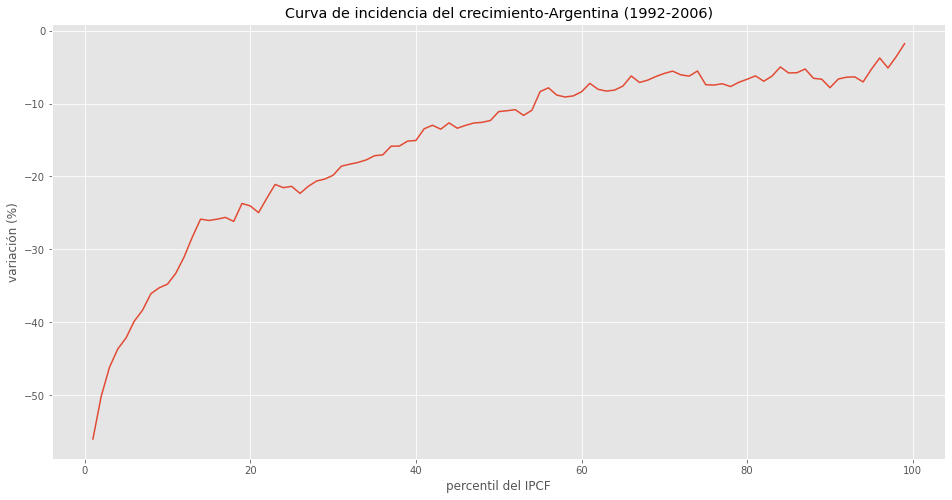

In [43]:
# Figura 2.21 - Curva de incidencia ipcf
plt.figure(figsize=(16,8))
plt.plot(df_92_06['change']*100)
plt.xlabel("percentil del IPCF")
plt.ylabel("variación (%)")
plt.title("Curva de incidencia del crecimiento-Argentina (1992-2006)")
plt.show()

En el caso particular de esta figura, las magnitudes son diferentes a los reportados orginalmente en el capitulo del libro, pero las interpretaciones se mantienen. La tasa de crecimiento del ingreso real está completamente por debajo del eje horizontal, denotando una pérdida de ingresos reales, que dada la pendiente positiva de la curva implica caídas proporcionales del ingreso más grandes a medida que vamos descendiendo hacia estratos más pobres de la distribución. Es claro que la desigualdad de ingresos debe haber aumentado en Argentina en ese período.